In [56]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [57]:
!pwd

/home/ec2-user/SageMaker/w210-capstone/aws-notebooks/epoch_splits/ra_2_20


In [58]:
#load in old data
# /home/ec2-user/SageMaker/w210-capstone/models/pytorch_imageclass
old_res = pd.read_csv("../../../original_model_results/resnet_basic_32_ra_2_20/results.csv")
old_res

,Unnamed: 0,Model,Epoch,Testset,Loss,Accuracy,Original_Accuracy,Original_CI,Unnamed: 0.1
0,0,resnet_basic_32_ra_2_20,200,cifar10,1.4212,0.7254,92.5,"(92.0, 93.0)",NaN
1,1,resnet_basic_32_ra_2_20,100,cifar10,1.6066,0.7281,92.5,"(92.0, 93.0)",NaN
2,2,resnet_basic_32_ra_2_20,200,cifar10.1,2.5458,0.5505,84.9,"(83.2, 86.4)",NaN
3,3,resnet_basic_32_ra_2_20,100,cifar10.1,1.9095,0.5490,84.9,"(83.2, 86.4)",NaN
4,4,resnet_basic_32_ra_2_20_refined200,250,cifar10,0.4312,0.8691,92.5,"(92.0, 93.0)",NaN
5,5,resnet_basic_32_ra_2_20_refined100,350,cifar10,0.3978,0.8700,92.5,"(92.0, 93.0)",NaN
6,6,resnet_basic_32_ra_2_20_refined200,250,cifar10.1,0.7625,0.7630,84.9,"(83.2, 86.4)",NaN
7,7,resnet_basic_32_ra_2_20_refined100,350,cifar10.1,0.7138,0.7700,84.9,"(83.2, 86.4)",NaN
8,0,resnet_basic_32_ra_2_20,400,cifar10,1.7503,0.7241,92.5,"(92.0, 93.0)",0.0
9,1,resnet_basic_32_ra_2_20,300,cifar10,1.6118,0.7259,92.5,"(92.0, 93.0)",1.0


In [59]:
# second round of results
new_res = pd.read_csv('/home/ec2-user/SageMaker/experiments/resnet_basic_32_ra_2_20/july2/results.csv')
new_res

,Unnamed: 0,Model,Epoch,Testset,Loss,Accuracy,Original_Accuracy,Original_CI
0,0,resnet_basic_32_ra_2_20,350,cifar10,1.8401,0.7096,92.5,"(92.0, 93.0)"
1,1,resnet_basic_32_ra_2_20,350,cifar10.1,3.2345,0.5380,84.9,"(83.2, 86.4)"
2,2,resnet_basic_32_ra_2_20_refined350,100,cifar10,0.3978,0.8700,92.5,"(92.0, 93.0)"
3,3,resnet_basic_32_ra_2_20_refined350,100,cifar10.1,0.8289,0.7760,84.9,"(83.2, 86.4)"
4,4,resnet_basic_32_ra_2_20,250,cifar10,1.6258,0.7112,92.5,"(92.0, 93.0)"
5,5,resnet_basic_32_ra_2_20_refined250,200,cifar10,0.4352,0.8695,92.5,"(92.0, 93.0)"
6,6,resnet_basic_32_ra_2_20,250,cifar10.1,2.8602,0.5350,84.9,"(83.2, 86.4)"
7,7,resnet_basic_32_ra_2_20_refined250,200,cifar10.1,0.7807,0.7715,84.9,"(83.2, 86.4)"
8,8,resnet_basic_32_ra_2_20,150,cifar10,1.3270,0.7220,92.5,"(92.0, 93.0)"
9,9,resnet_basic_32_ra_2_20,150,cifar10.1,2.4433,0.5390,84.9,"(83.2, 86.4)"


In [60]:
temp_df = pd.concat([new_res, old_res], axis = 0)
temp_df

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,Accuracy,Epoch,Loss,Model,Original_Accuracy,Original_CI,Testset,Unnamed: 0,Unnamed: 0.1
0,0.7096,350,1.8401,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10,0,NaN
1,0.5380,350,3.2345,resnet_basic_32_ra_2_20,84.9,"(83.2, 86.4)",cifar10.1,1,NaN
2,0.8700,100,0.3978,resnet_basic_32_ra_2_20_refined350,92.5,"(92.0, 93.0)",cifar10,2,NaN
3,0.7760,100,0.8289,resnet_basic_32_ra_2_20_refined350,84.9,"(83.2, 86.4)",cifar10.1,3,NaN
4,0.7112,250,1.6258,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10,4,NaN
5,0.8695,200,0.4352,resnet_basic_32_ra_2_20_refined250,92.5,"(92.0, 93.0)",cifar10,5,NaN
6,0.5350,250,2.8602,resnet_basic_32_ra_2_20,84.9,"(83.2, 86.4)",cifar10.1,6,NaN
7,0.7715,200,0.7807,resnet_basic_32_ra_2_20_refined250,84.9,"(83.2, 86.4)",cifar10.1,7,NaN
8,0.7220,150,1.3270,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10,8,NaN
9,0.5390,150,2.4433,resnet_basic_32_ra_2_20,84.9,"(83.2, 86.4)",cifar10.1,9,NaN


In [61]:
temp_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)
temp_df

,Accuracy,Epoch,Loss,Model,Original_Accuracy,Original_CI,Testset
0,0.7096,350,1.8401,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
1,0.5380,350,3.2345,resnet_basic_32_ra_2_20,84.9,"(83.2, 86.4)",cifar10.1
2,0.8700,100,0.3978,resnet_basic_32_ra_2_20_refined350,92.5,"(92.0, 93.0)",cifar10
3,0.7760,100,0.8289,resnet_basic_32_ra_2_20_refined350,84.9,"(83.2, 86.4)",cifar10.1
4,0.7112,250,1.6258,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
5,0.8695,200,0.4352,resnet_basic_32_ra_2_20_refined250,92.5,"(92.0, 93.0)",cifar10
6,0.5350,250,2.8602,resnet_basic_32_ra_2_20,84.9,"(83.2, 86.4)",cifar10.1
7,0.7715,200,0.7807,resnet_basic_32_ra_2_20_refined250,84.9,"(83.2, 86.4)",cifar10.1
8,0.7220,150,1.3270,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
9,0.5390,150,2.4433,resnet_basic_32_ra_2_20,84.9,"(83.2, 86.4)",cifar10.1


In [62]:
# cifar10 only
df_cifar10 = temp_df[temp_df['Testset'] == 'cifar10'].reset_index()
df_cifar10

,index,Accuracy,Epoch,Loss,Model,Original_Accuracy,Original_CI,Testset
0,0,0.7096,350,1.8401,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
1,2,0.8700,100,0.3978,resnet_basic_32_ra_2_20_refined350,92.5,"(92.0, 93.0)",cifar10
2,4,0.7112,250,1.6258,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
3,5,0.8695,200,0.4352,resnet_basic_32_ra_2_20_refined250,92.5,"(92.0, 93.0)",cifar10
4,8,0.7220,150,1.3270,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
5,10,0.8733,300,0.4104,resnet_basic_32_ra_2_20_refined150,92.5,"(92.0, 93.0)",cifar10
6,0,0.7254,200,1.4212,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
7,1,0.7281,100,1.6066,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
8,4,0.8691,250,0.4312,resnet_basic_32_ra_2_20_refined200,92.5,"(92.0, 93.0)",cifar10
9,5,0.8700,350,0.3978,resnet_basic_32_ra_2_20_refined100,92.5,"(92.0, 93.0)",cifar10


In [63]:
# cifar10.1 only
df_cifar101 = temp_df[temp_df['Testset'] != 'cifar10'].reset_index()
df_cifar101

,index,Accuracy,Epoch,Loss,Model,Original_Accuracy,Original_CI,Testset
0,1,0.5380,350,3.2345,resnet_basic_32_ra_2_20,84.9,"(83.2, 86.4)",cifar10.1
1,3,0.7760,100,0.8289,resnet_basic_32_ra_2_20_refined350,84.9,"(83.2, 86.4)",cifar10.1
2,6,0.5350,250,2.8602,resnet_basic_32_ra_2_20,84.9,"(83.2, 86.4)",cifar10.1
3,7,0.7715,200,0.7807,resnet_basic_32_ra_2_20_refined250,84.9,"(83.2, 86.4)",cifar10.1
4,9,0.5390,150,2.4433,resnet_basic_32_ra_2_20,84.9,"(83.2, 86.4)",cifar10.1
5,11,0.7315,300,0.7755,resnet_basic_32_ra_2_20_refined150,84.9,"(83.2, 86.4)",cifar10.1
6,2,0.5505,200,2.5458,resnet_basic_32_ra_2_20,84.9,"(83.2, 86.4)",cifar10.1
7,3,0.5490,100,1.9095,resnet_basic_32_ra_2_20,84.9,"(83.2, 86.4)",cifar10.1
8,6,0.7630,250,0.7625,resnet_basic_32_ra_2_20_refined200,84.9,"(83.2, 86.4)",cifar10.1
9,7,0.7700,350,0.7138,resnet_basic_32_ra_2_20_refined100,84.9,"(83.2, 86.4)",cifar10.1


In [68]:
sorted_df = df_cifar10.sort_values(by= 'Epoch')
non_ref = df_cifar10[df_cifar10['Model'] == "resnet_basic_32_ra_2_20"]
refined = df_cifar10[df_cifar10['Model'] != "resnet_basic_32_ra_2_20"]
refined['Epoch'] = 450 - refined['Epoch']

refined.sort_values(by = 'Epoch', inplace = True)
non_ref.sort_values(by = 'Epoch', inplace = True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
non_ref

,index,Accuracy,Epoch,Loss,Model,Original_Accuracy,Original_CI,Testset
7,1,0.7281,100,1.6066,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
4,8,0.7220,150,1.3270,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
6,0,0.7254,200,1.4212,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
2,4,0.7112,250,1.6258,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
11,9,0.7259,300,1.6118,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
0,0,0.7096,350,1.8401,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
10,8,0.7241,400,1.7503,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10


In [70]:
refined

,index,Accuracy,Epoch,Loss,Model,Original_Accuracy,Original_CI,Testset
9,5,0.8700,100,0.3978,resnet_basic_32_ra_2_20_refined100,92.5,"(92.0, 93.0)",cifar10
5,10,0.8733,150,0.4104,resnet_basic_32_ra_2_20_refined150,92.5,"(92.0, 93.0)",cifar10
8,4,0.8691,200,0.4312,resnet_basic_32_ra_2_20_refined200,92.5,"(92.0, 93.0)",cifar10
3,5,0.8695,250,0.4352,resnet_basic_32_ra_2_20_refined250,92.5,"(92.0, 93.0)",cifar10
13,13,0.8740,300,0.4342,resnet_basic_32_ra_2_20_refined300,92.5,"(92.0, 93.0)",cifar10
1,2,0.8700,350,0.3978,resnet_basic_32_ra_2_20_refined350,92.5,"(92.0, 93.0)",cifar10
12,12,0.8670,400,0.4279,resnet_basic_32_ra_2_20_refined400,92.5,"(92.0, 93.0)",cifar10


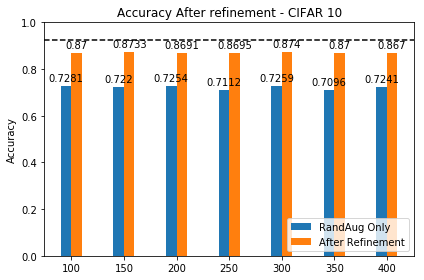

In [78]:
labels = ['100', '150', '200', '250', '300', '350', '400']


x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, non_ref['Accuracy'], width, label='RandAug Only')
rects2 = ax.bar(x + width/2, refined['Accuracy'], width, label='After Refinement')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy After refinement - CIFAR 10')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'lower right')
ax.set_ylim([0,1.0])
ax.axhline(y = 0.9232, ls = '--', color = 'black')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 4)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [79]:
non_ref = df_cifar101[df_cifar101['Model'] == "resnet_basic_32_ra_2_20"]
refined = df_cifar101[df_cifar101['Model'] != "resnet_basic_32_ra_2_20"]
refined['Epoch'] = 450 - refined['Epoch']

refined.sort_values(by = 'Epoch', inplace = True)
non_ref.sort_values(by = 'Epoch', inplace = True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


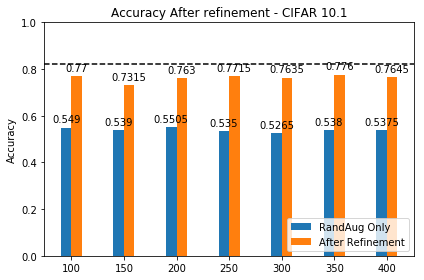

In [80]:
labels = ['100', '150', '200', '250', '300', '350', '400']


x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, non_ref['Accuracy'], width, label='RandAug Only')
rects2 = ax.bar(x + width/2, refined['Accuracy'], width, label='After Refinement')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy After refinement - CIFAR 10.1')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'lower right')
ax.set_ylim([0,1.0])
ax.axhline(y = 0.823, ls = '--', color = 'black')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 4)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [81]:
acc_gap = df_cifar10['Accuracy'] - df_cifar101['Accuracy']
loss_gap = df_cifar10['Loss'] - df_cifar101['Loss']

In [82]:
df_dist_gap = df_cifar10.copy()
df_dist_gap['Accuracy'] = acc_gap
df_dist_gap['Loss'] = loss_gap

In [86]:
df_dist_gap

,index,Accuracy,Epoch,Loss,Model,Original_Accuracy,Original_CI,Testset
0,0,0.1716,350,-1.3944,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
1,2,0.0940,100,-0.4311,resnet_basic_32_ra_2_20_refined350,92.5,"(92.0, 93.0)",cifar10
2,4,0.1762,250,-1.2344,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
3,5,0.0980,200,-0.3455,resnet_basic_32_ra_2_20_refined250,92.5,"(92.0, 93.0)",cifar10
4,8,0.1830,150,-1.1163,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
5,10,0.1418,300,-0.3651,resnet_basic_32_ra_2_20_refined150,92.5,"(92.0, 93.0)",cifar10
6,0,0.1749,200,-1.1246,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
7,1,0.1791,100,-0.3029,resnet_basic_32_ra_2_20,92.5,"(92.0, 93.0)",cifar10
8,4,0.1061,250,-0.3313,resnet_basic_32_ra_2_20_refined200,92.5,"(92.0, 93.0)",cifar10
9,5,0.1000,350,-0.3160,resnet_basic_32_ra_2_20_refined100,92.5,"(92.0, 93.0)",cifar10


In [88]:
non_ref = df_dist_gap[df_dist_gap['Model'] == "resnet_basic_32_ra_2_20"]
refined = df_dist_gap[df_dist_gap['Model'] != "resnet_basic_32_ra_2_20"]
refined['Epoch'] = 450 - refined['Epoch']

refined.sort_values(by = 'Epoch', inplace = True)
non_ref.sort_values(by = 'Epoch', inplace = True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [89]:
refined

,index,Accuracy,Epoch,Loss,Model,Original_Accuracy,Original_CI,Testset
9,5,0.1000,100,-0.3160,resnet_basic_32_ra_2_20_refined100,92.5,"(92.0, 93.0)",cifar10
5,10,0.1418,150,-0.3651,resnet_basic_32_ra_2_20_refined150,92.5,"(92.0, 93.0)",cifar10
8,4,0.1061,200,-0.3313,resnet_basic_32_ra_2_20_refined200,92.5,"(92.0, 93.0)",cifar10
3,5,0.0980,250,-0.3455,resnet_basic_32_ra_2_20_refined250,92.5,"(92.0, 93.0)",cifar10
13,13,0.1105,300,-0.3577,resnet_basic_32_ra_2_20_refined300,92.5,"(92.0, 93.0)",cifar10
1,2,0.0940,350,-0.4311,resnet_basic_32_ra_2_20_refined350,92.5,"(92.0, 93.0)",cifar10
12,12,0.1025,400,-0.3782,resnet_basic_32_ra_2_20_refined400,92.5,"(92.0, 93.0)",cifar10


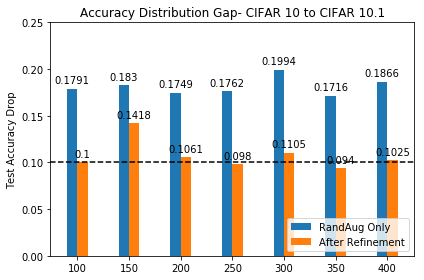

In [92]:
labels = ['100', '150', '200', '250', '300', '350', '400']


x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, non_ref['Accuracy'], width, label='RandAug Only')
rects2 = ax.bar(x + width/2, refined['Accuracy'], width, label='After Refinement')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Test Accuracy Drop')
ax.set_title('Accuracy Distribution Gap- CIFAR 10 to CIFAR 10.1')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'lower right')
ax.set_ylim([0,0.25])
ax.axhline(y = 0.1002, ls = '--', color = 'black')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 4)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [93]:
from scipy.stats import ttest_1samp

In [94]:
# t test for distribution gap being different than the baseline
ttest_1samp(refined.Accuracy, 10.02)

Ttest_1sampResult(statistic=-1636.3607814224868, pvalue=3.515821720947427e-18)